# Necessary libraries for EDA

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Necessary libaries for Machine Learning

In [70]:
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

# 1. Import and warehouse data:

In [71]:
df1 = pd.read_csv('Part2 -Data1.csv')
df2 = pd.read_csv('Part2 -Data2.csv')

In [72]:
row, column = df1.shape
print('The first dataset contains', row, 'rows and', column, 'columns')

The first dataset contains 5000 rows and 8 columns


In [73]:
row, column = df2.shape
print('The second dataset contains', row, 'rows and', column, 'columns')

The second dataset contains 5000 rows and 7 columns


# Merge all datasets onto one and explore final shape and size.

In [74]:
df = pd.merge(df1,df2)

In [75]:
row, column = df.shape
print('The all dataset contains', row, 'rows and', column, 'columns')

The all dataset contains 5000 rows and 14 columns


# 2. Data cleansing:

# Explore and if required correct the datatypes of each attribute

In [76]:
df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [78]:
df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

# Explore for null values in the attributes and if required drop or impute values.

In [79]:
print('Null values:\n',df.isnull().sum())

Null values:
 ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64


With reference to the above output, it is concluded that "there are 20 missing values present for target variable "LoanOnCard" in the given data". Hence it will be drop from the null value rows from the data

In [80]:
df = df.dropna()

In [81]:
df.shape

(4980, 14)

After droping the null values from the given data, it observed that 4980 rows and 14 coulumns

In [82]:
df.LoanOnCard.unique()

array([1., 0.])

# 3. Data analysis & visualisation:

# Perform detailed statistical analysis on the data.

In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4980.0,2510.345382,1438.011129,10.0,1265.75,2510.5,3755.250,5000.0
Age,4980.0,45.352610,11.464212,23.0,35.00,45.0,55.000,67.0
CustomerSince,4980.0,20.117671,11.468716,-3.0,10.00,20.0,30.000,43.0
HighestSpend,4980.0,73.852410,46.070090,8.0,39.00,64.0,98.000,224.0
ZipCode,4980.0,93152.420482,2123.660073,9307.0,91911.00,93407.0,94608.000,96651.0
HiddenScore,4980.0,2.395582,1.147200,1.0,1.00,2.0,3.000,4.0
MonthlyAverageSpend,4980.0,1.939536,1.750006,0.0,0.70,1.5,2.525,10.0
Level,4980.0,1.880924,0.840144,1.0,1.00,2.0,3.000,3.0
Mortgage,4980.0,56.589759,101.836758,0.0,0.00,0.0,101.000,635.0
Security,4980.0,0.104418,0.305832,0.0,0.00,0.0,0.000,1.0


    Understanding Categorical Variables from the given dataset - 

        ID           : Categorical, qualitative, nominal variable with lowest id being 0 and highest value of id being 4980.
        ZIPCode      : Categorical (sum of two zip codes is not meaningful), qualitative, nominal.
        HiddenScore  : Categorical, qualitative, ordinal. Lowest level is 1 and max being 4.
        Level        : Categorical, qualitative, ordinal. 1, 2, 3.
        Security     : Categorical (binary),qualitative, nominal.If the customer has a security with the bank then 1 else 0.
        FixedDepositAccount: categorical (binary),qualitatitve,nominal.If the customer has a FD with the bank then 1 else 0.
        Online       :Categorical (binary),qualitative, nominal. If the customer uses internet banking then 1 else 0.
        CreditCard:   Categorical (binary), qualitative, nominal. If the customer use a credit card then 1 else 0.

    Understnading Numerical Variables from the given dataset -      
     Age  : Numerical, quantitative, ratio (has true zero, technically). Min age in the dataset 23 and max age 67.
    CustomerSince: Numerical (continuous), quantitative.Minimum value observed in the dataset is -3(which seems to be an     error) and maximum value observed in the dataset is 43.
    HighestSpend : Numerical (continuous), quantitative. Min value in the dataset is 8 while the max value is 224.
    MonthlyAverageSpend:Numerical(continuous),quantitative,interval.Min average spending month is zero and maximum is 10.
    Mortgage: Numerical(continuous),quantitative,interval.Min mortage value in the dataset is zero, which means there was no house mortgage, and maximum value is 635.

In [84]:
print(df['Age'].describe()[['min','25%','50%','75%','max']])
print(df['CustomerSince'].describe()[['min','25%','50%','75%','max']])
print(df['HighestSpend'].describe()[['min','25%','50%','75%','max']])
print(df['MonthlyAverageSpend'].describe()[['min','25%','50%','75%','max']])
print(df['Mortgage'].describe()[['min','25%','50%','75%','max']])

min    23.0
25%    35.0
50%    45.0
75%    55.0
max    67.0
Name: Age, dtype: float64
min    -3.0
25%    10.0
50%    20.0
75%    30.0
max    43.0
Name: CustomerSince, dtype: float64
min      8.0
25%     39.0
50%     64.0
75%     98.0
max    224.0
Name: HighestSpend, dtype: float64
min     0.000
25%     0.700
50%     1.500
75%     2.525
max    10.000
Name: MonthlyAverageSpend, dtype: float64
min      0.0
25%      0.0
50%      0.0
75%    101.0
max    635.0
Name: Mortgage, dtype: float64


In [85]:
skew_Age=df['Age'].skew(axis=0)
print("skew_Age:",skew_Age)
skew_CustomerSince=df['CustomerSince'].skew(axis=0)
print("skew_CustomerSince:",skew_CustomerSince)
skew_HighestSpend=df['HighestSpend'].skew(axis=0)
print("skew_HighestSpend:",skew_HighestSpend)
skew_MonthlyAverageSpend=df['MonthlyAverageSpend'].skew(axis=0)
print("skew_MonthlyAverageSpend:",skew_MonthlyAverageSpend)
skew_Mortgage=df['Mortgage'].skew(axis=0)
print("skew_Mortgage:",skew_Mortgage)

skew_Age: -0.030793501405371078
skew_CustomerSince: -0.027883570334149937
skew_HighestSpend: 0.8395240273859003
skew_MonthlyAverageSpend: 1.5960013082764528
skew_Mortgage: 2.1020299067040793


In [86]:
# identify outliers for 'Age'

q25, q75 = np.percentile(df['Age'], 25), np.percentile(df['Age'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df['Age'] if x < lower or x > upper]
print('Identified outliers for Age out of 4980 records: %d' % len(outliers))

Identified outliers for Age out of 4980 records: 0


In [87]:
# identify outliers for 'CustomerSince'

q25, q75 = np.percentile(df['CustomerSince'], 25), np.percentile(df['CustomerSince'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df['CustomerSince'] if x < lower or x > upper]
print('Identified outliers for CustomerSince out of 4980 records: %d' % len(outliers))

Identified outliers for CustomerSince out of 4980 records: 0


In [88]:
# identify outliers for 'HighestSpend'

q25, q75 = np.percentile(df['HighestSpend'], 25), np.percentile(df['HighestSpend'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df['HighestSpend'] if x < lower or x > upper]
print('Identified outliers for HighestSpend out of 4980 records: %d' % len(outliers))

Identified outliers for HighestSpend out of 4980 records: 96


In [89]:
# identify outliers for 'MonthlyAverageSpend'

q25, q75 = np.percentile(df['MonthlyAverageSpend'], 25), np.percentile(df['MonthlyAverageSpend'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df['MonthlyAverageSpend'] if x < lower or x > upper]
print('Identified outliers for MonthlyAverageSpend out of 4980 records: %d' % len(outliers))

Identified outliers for MonthlyAverageSpend out of 4980 records: 324


In [90]:
# identify outliers for 'Mortgage'

q25, q75 = np.percentile(df['Mortgage'], 25), np.percentile(df['Mortgage'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df['Mortgage'] if x < lower or x > upper]
print('Identified outliers for Mortgage out of 4980 records: %d' % len(outliers))

Identified outliers for Mortgage out of 4980 records: 291


From the above observation,'HighestSpend', 'MonthlyAverageSpend' and 'Mortgage' are having more outliers when compare to other attributes.

# Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

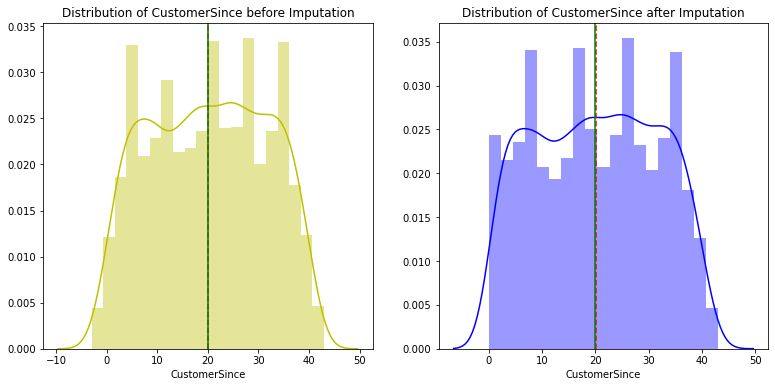

In [91]:
# Checking distribution of "CustomerSince" column before and after imputation
fig = plt.figure(figsize=(13, 6))

ax = fig.add_subplot(121)
sns.distplot(df['CustomerSince'], color = 'y', ax = ax).set_title('Distribution of CustomerSince before Imputation')
ax.axvline(df['CustomerSince'].mean(), color = 'r', linestyle = '--', label = 'Mean')
ax.axvline(df['CustomerSince'].median(), color = 'g', linestyle = '-', label = 'Median')

replace_value = df.loc[(df['Age'] > 23) & (df['Age'] <= 29) & (df['HighestSpend'] > 12) & (df['HighestSpend'] < 150) & 
         (df['LoanOnCard'] == 0) & (df['FixedDepositAccount'] == 0), 'CustomerSince'].median()

# replacing the negative values with 2
df['CustomerSince'] = np.where(df['CustomerSince'] < 0, replace_value, df['CustomerSince'])

ax = fig.add_subplot(122)
sns.distplot(df['CustomerSince'], color = 'b', ax = ax).set_title('Distribution of CustomerSince after Imputation')
ax.axvline(df['CustomerSince'].mean(), color = 'r', linestyle = '--', label = 'Mean')
ax.axvline(df['CustomerSince'].median(), color = 'g', linestyle = '-', label = 'Median')

In [92]:
df['CustomerSince'].describe()

count    4980.000000
mean       20.153012
std        11.407156
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: CustomerSince, dtype: float64

Text(0.5, 1.0, 'Distribution of Mortgage for taking LoanOnCard')

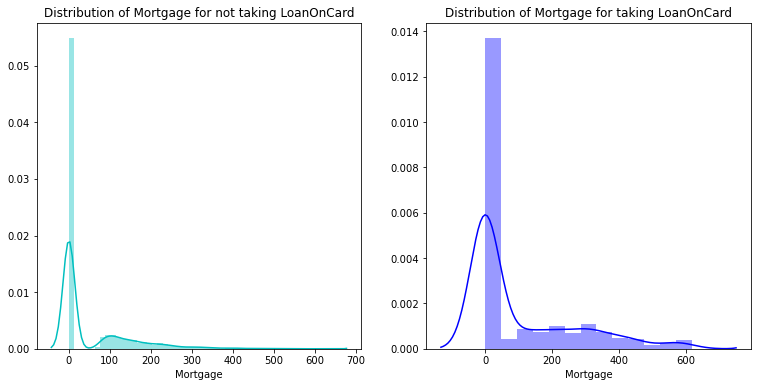

In [93]:
# Distribution of Mortgage
fig = plt.figure(figsize = (12.8, 6))

ax = fig.add_subplot(121)
sns.distplot(df[(df['LoanOnCard'] == 0)]['Mortgage'], color = 'c', 
             ax = ax).set_title('Distribution of Mortgage for not taking LoanOnCard')

ax= fig.add_subplot(122)
sns.distplot(df[(df['LoanOnCard'] == 1)]['Mortgage'], color = 'b', 
             ax = ax).set_title('Distribution of Mortgage for taking LoanOnCard')

Text(0.5, 1.0, 'Distribution of HighestSpend for taking LoanOnCard')

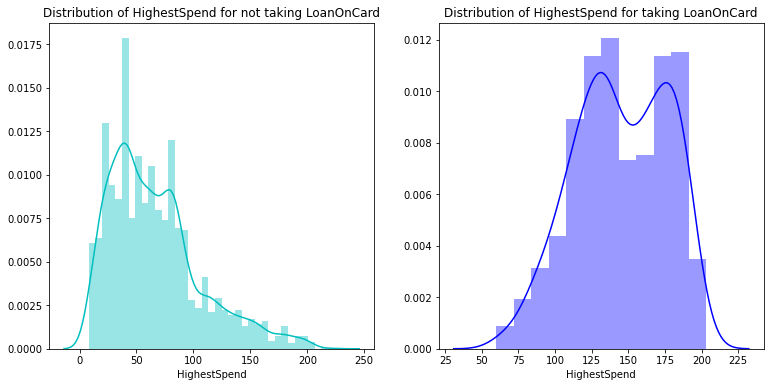

In [94]:
# Distribution of HighestSpend
fig = plt.figure(figsize = (12.8, 6))

ax = fig.add_subplot(121)
sns.distplot(df[(df['LoanOnCard'] == 0)]['HighestSpend'], color = 'c', 
             ax = ax).set_title('Distribution of HighestSpend for not taking LoanOnCard')

ax= fig.add_subplot(122)
sns.distplot(df[(df['LoanOnCard'] == 1)]['HighestSpend'], color = 'b', 
             ax = ax).set_title('Distribution of HighestSpend for taking LoanOnCard')

Text(0.5, 1.0, 'Distribution of MonthlyAverageSpend for taking LoanOnCard')

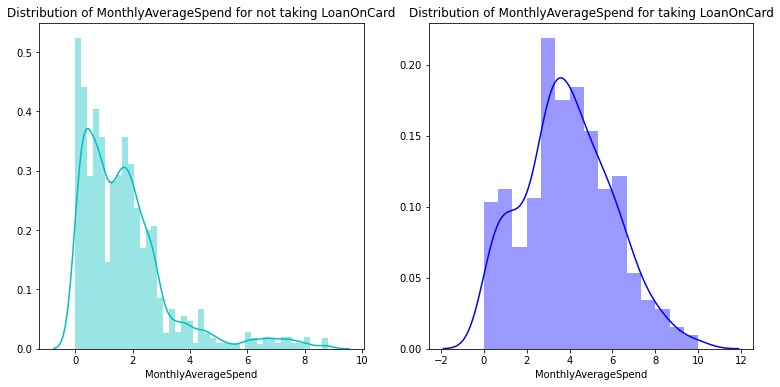

In [95]:
# Distribution of MonthlyAverageSpend
fig = plt.figure(figsize = (12.8, 6))

ax = fig.add_subplot(121)
sns.distplot(df[(df['LoanOnCard'] == 0)]['MonthlyAverageSpend'], color = 'c', 
             ax = ax).set_title('Distribution of MonthlyAverageSpend for not taking LoanOnCard')

ax= fig.add_subplot(122)
sns.distplot(df[(df['LoanOnCard'] == 1)]['MonthlyAverageSpend'], color = 'b', 
             ax = ax).set_title('Distribution of MonthlyAverageSpend for taking LoanOnCard')

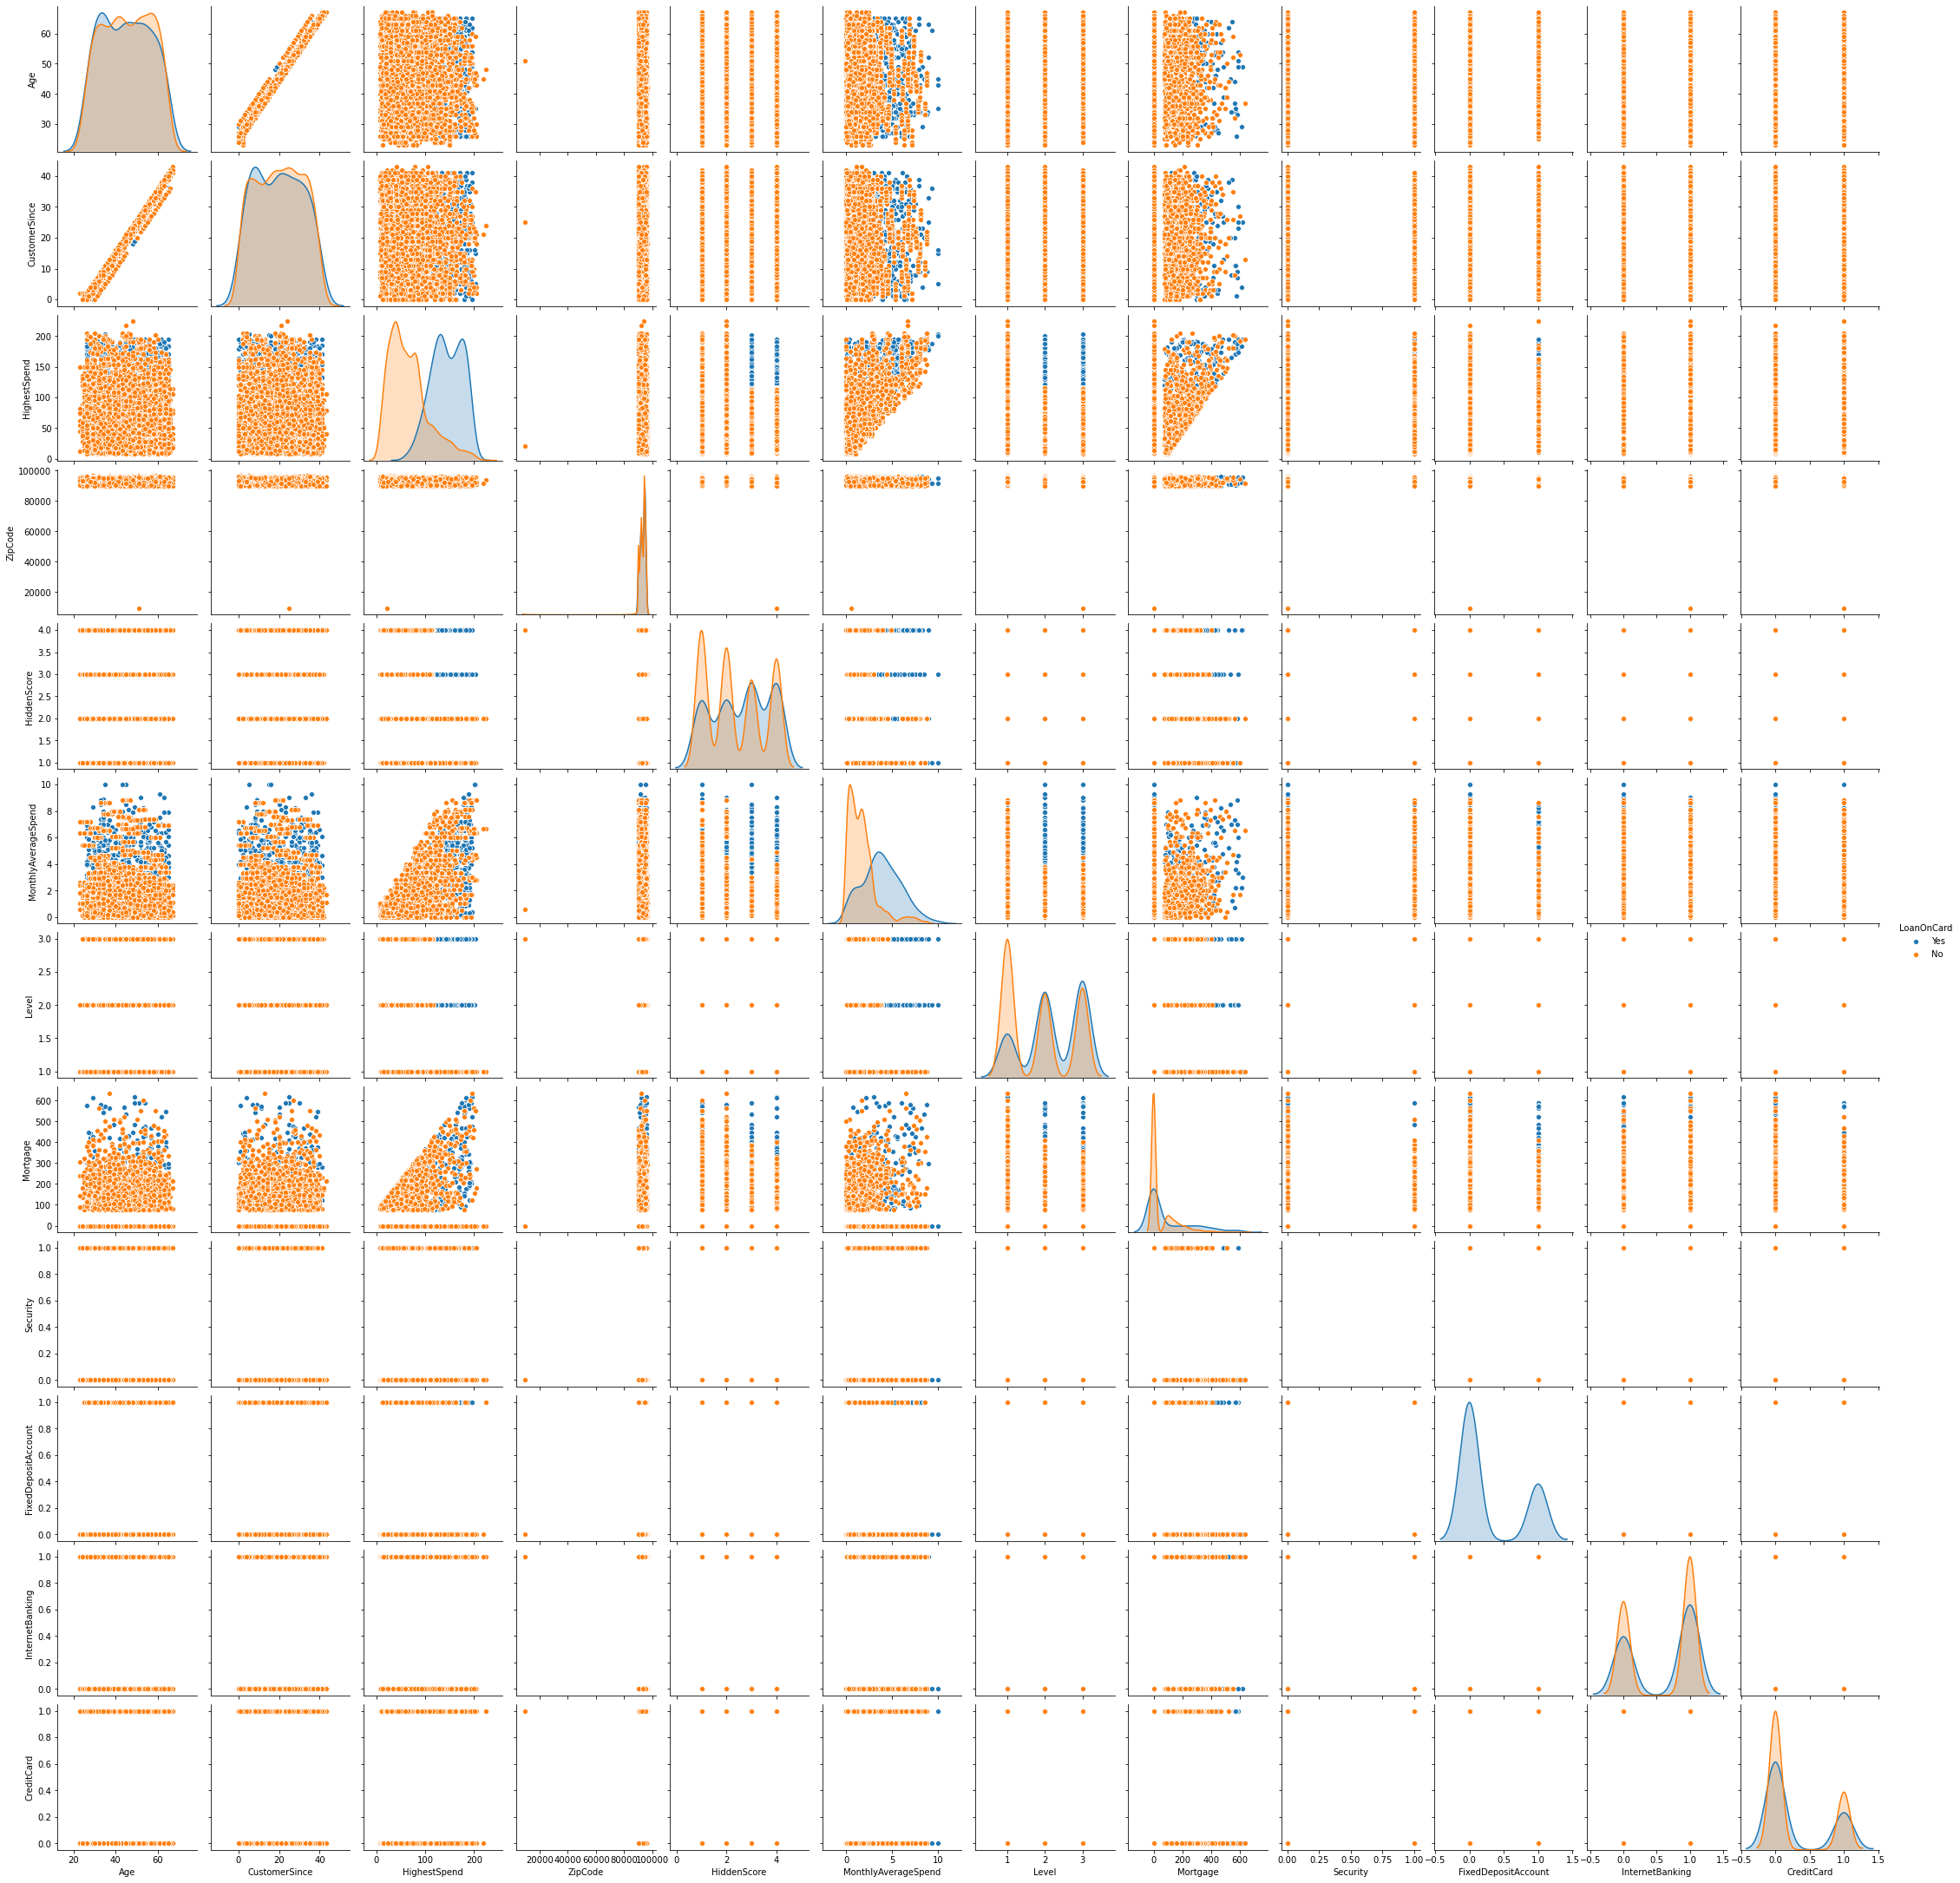

In [96]:
# Pairplot
pairplt = df.drop('ID', axis = 1)
pairplt['LoanOnCard'] = pairplt['LoanOnCard'].replace({0: 'No', 1: 'Yes'})
sns.pairplot(pairplt, hue = 'LoanOnCard')

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
384,385,51,25.0,21,9307,4,0.6,3,0,0,0,1,1,0.0


Text(0.5, 1.0, 'Outlier in Zip Code')

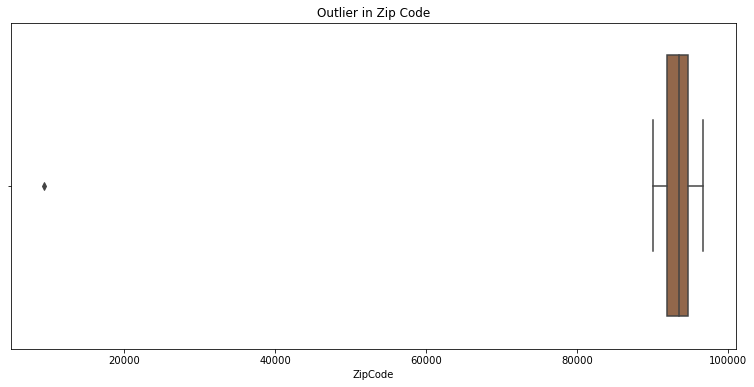

In [97]:
# Checking the outlier in ZIP Code
display(df[df['ZipCode'] < 10000])
plt.figure(figsize = (13 , 6))
sns.boxplot(df['ZipCode'], palette = 'copper').set_title('Outlier in Zip Code')

In [98]:
# dropping index 384
df.drop(384, axis = 0, inplace = True)

<Figure size 1440x720 with 0 Axes>

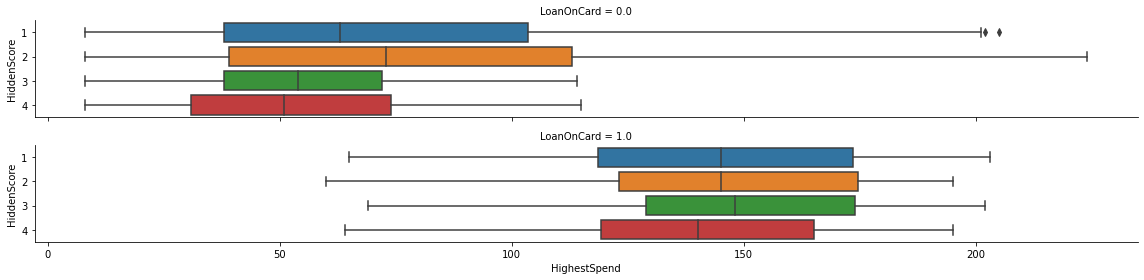

In [99]:
# Distribution of HiddenScore by LoanOnCard and affect of HighestSpend
plt.figure(figsize = (20 , 10))
sns.catplot(x = 'HighestSpend', y = 'HiddenScore', row = 'LoanOnCard', kind = 'box', orient = 'h', height = 2, aspect = 8, 
            data = df)

<Figure size 1440x432 with 0 Axes>

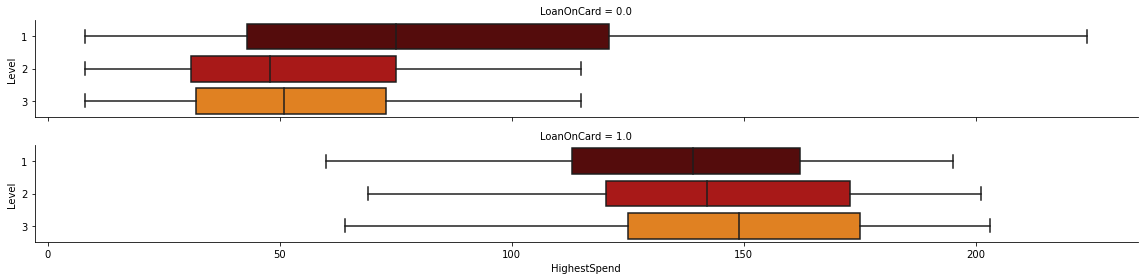

In [100]:
# Distribution of Level by LoanOnCard and affect of HighestSpend
plt.figure(figsize = (20 , 6))
sns.catplot(x = 'HighestSpend', y = 'Level', row = 'LoanOnCard', kind = 'box', orient = 'h', 
            height = 2, aspect = 8, palette = 'gist_heat', data = df)

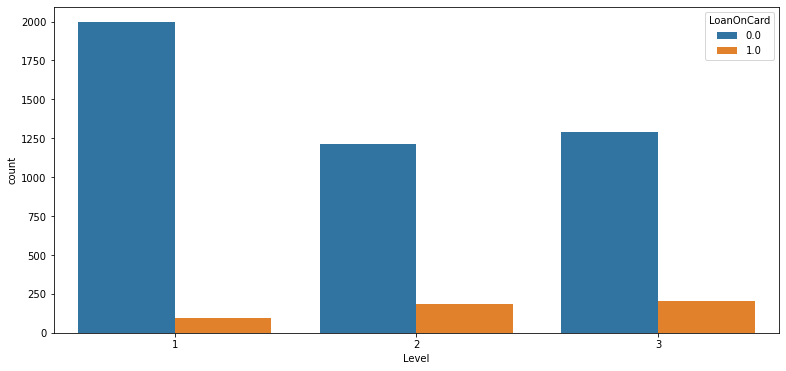

In [101]:
# Countplot of Level by LoanOnCard
plt.figure(figsize = (13 , 6))
sns.countplot(x = 'Level', hue ='LoanOnCard', data = df)

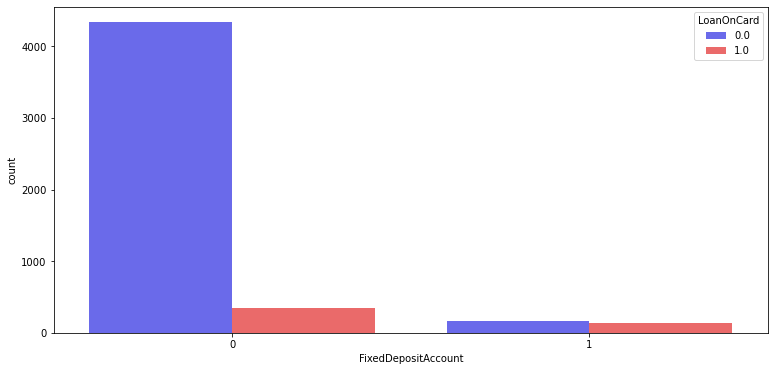

In [102]:
# Countplot of FixedDepositAccount by LoanOnCard
plt.figure(figsize = (12.8 , 6))
sns.countplot(x = 'FixedDepositAccount', hue ='LoanOnCard', palette = 'seismic', data = df)

In [103]:
# Checking number of unique values for categorical columns
cat_cols = ['ZipCode', 'HiddenScore', 'Level', 'LoanOnCard', 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard']
df[cat_cols].nunique()

ZipCode                466
HiddenScore              4
Level                    3
LoanOnCard               2
Security                 2
FixedDepositAccount      2
InternetBanking          2
CreditCard               2
dtype: int64

# Removing columns from the further analysis

In [104]:
df.drop(['ID', 'ZipCode'], axis = 1, inplace = True)
df.columns

Index(['Age', 'CustomerSince', 'HighestSpend', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Matrix of Data')

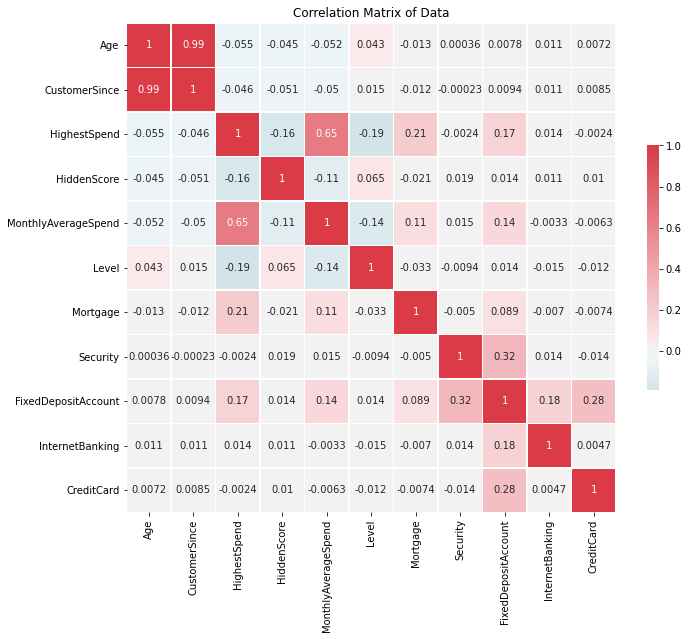

In [105]:
# Correlation matrix for all variables
corr = df.drop('LoanOnCard', axis = 1).corr()
f, ax = plt.subplots(figsize = (11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, cmap = cmap, vmax = 1, center = 0, square = True, 
            linewidths = .5, cbar_kws = {"shrink": .5}, annot = True)
ax.set_title('Correlation Matrix of Data')

In [106]:
# Filter for correlation value greater than 0.5
sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
sort[(sort > 0.5) & (sort < 1)]

CustomerSince        Age                    0.993917
Age                  CustomerSince          0.993917
MonthlyAverageSpend  HighestSpend           0.646056
HighestSpend         MonthlyAverageSpend    0.646056
dtype: float64

In [107]:
# Absolute correlation of independent variables with 'LoanOnCard' i.e. the target variable
absCorrwithDep = []
allVars = df.drop('LoanOnCard', axis = 1).columns

for var in allVars:
    absCorrwithDep.append(abs(df['LoanOnCard'].corr(df[var])))

display(pd.DataFrame([allVars, absCorrwithDep], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))

,Variable,Correlation
2,HighestSpend,0.502622
4,MonthlyAverageSpend,0.366887
8,FixedDepositAccount,0.31612
6,Mortgage,0.141916
5,Level,0.137123
3,HiddenScore,0.0618655
7,Security,0.0219602
1,CustomerSince,0.00882776
0,Age,0.00811491
9,InternetBanking,0.00608822


# 4. Data pre-processing:

# Segregate predictors vs target attributes

In [108]:
# Transform data into features and target
X = df.drop(['LoanOnCard'], axis=1)
y = df['LoanOnCard']
X

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
9,34,9.0,180,1,8.9,3,0,0,0,0,0
10,65,39.0,105,4,2.4,3,0,0,0,0,0
11,29,5.0,45,3,0.1,2,0,0,0,1,0
12,48,23.0,114,2,3.8,3,0,1,0,0,0
13,59,32.0,40,4,2.5,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3.0,40,1,1.9,3,0,0,0,1,0
4996,30,4.0,15,4,0.4,1,85,0,0,1,0
4997,63,39.0,24,2,0.3,3,0,0,0,0,0
4998,65,40.0,49,3,0.5,2,0,0,0,1,0


# Check for target balancing and fix it if found imbalanced

In [109]:
y.value_counts()

0.0    4499
1.0     480
Name: LoanOnCard, dtype: int64

# Perform train-test split.

In [110]:
# Splitting the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3485, 11)

(1494, 11)

(3485,)

(1494,)

In [111]:
y_train.value_counts()

0.0    3145
1.0     340
Name: LoanOnCard, dtype: int64

In [112]:
sm = SMOTE(random_state = 42, sampling_strategy='minority')
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
y_train_res.value_counts()

1.0    3145
0.0    3145
Name: LoanOnCard, dtype: int64

# Model training, testing and tuning:

# Logistic regression

Logistic Regression Scores without Hyperparameter Tuning with imbalanced data


LR accuracy for train set: 0.948
LR accuracy for test set: 0.942

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1354
         1.0       0.75      0.59      0.66       140

    accuracy                           0.94      1494
   macro avg       0.85      0.78      0.81      1494
weighted avg       0.94      0.94      0.94      1494


Confusion Matrix:
 [[1326   28]
 [  58   82]]

Accuracy Score:
 0.942


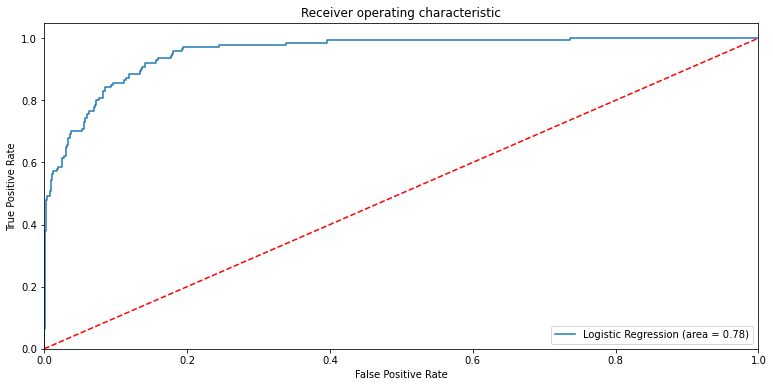

In [113]:
# Check with imbalanced target for the train data
# LR model without hyperparameter tuning
LR = LogisticRegression()
LR.fit(X_train, y_train)

print('Logistic Regression Scores without Hyperparameter Tuning with imbalanced data\n\n')
print('LR accuracy for train set: {0:.3f}'.format(LR.score(X_train, y_train)))
print('LR accuracy for test set: {0:.3f}'.format(LR.score(X_test, y_test)))

y_true, y_pred = y_test, LR.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
LR_roc_auc = roc_auc_score(y_true, LR.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, LR.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Logistic Regression (area = {})'.\
         format(LR_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

Logistic Regression Scores with Hyperparameter Tuning with imbalanced data


Best Hyper Parameters are:  {'C': 1, 'max_iter': 110, 'penalty': 'l2'}
Best Score is:  0.948
LR accuracy for train set: 0.947
LR accuracy for test set: 0.941

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1354
         1.0       0.73      0.59      0.65       140

    accuracy                           0.94      1494
   macro avg       0.85      0.78      0.81      1494
weighted avg       0.94      0.94      0.94      1494


Confusion Matrix:
 [[1324   30]
 [  58   82]]

Accuracy Score:
 0.941


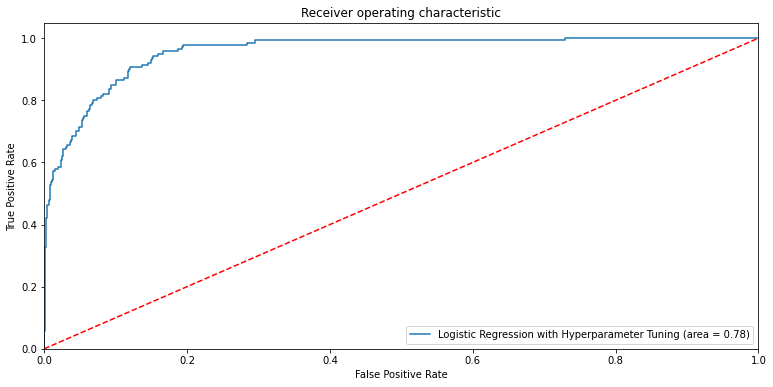

In [114]:
# Check with imbalanced target for the train data
# LR with hyperparameter tuning
LR = LogisticRegression(random_state = 42)

params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 110, 120, 130, 140]}

skf = StratifiedKFold(n_splits = 10)
LR_hyper = GridSearchCV(LR, param_grid = params, n_jobs = -1, cv = skf)

LR_hyper.fit(X_train, y_train)

print('Logistic Regression Scores with Hyperparameter Tuning with imbalanced data\n\n')
print('Best Hyper Parameters are: ', LR_hyper.best_params_)
print('Best Score is: ', LR_hyper.best_score_.round(3))

print('LR accuracy for train set: {0:.3f}'.format(LR_hyper.score(X_train, y_train)))
print('LR accuracy for test set: {0:.3f}'.format(LR_hyper.score(X_test, y_test)))

y_true, y_pred = y_test, LR_hyper.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
LR_hyper_roc_auc = roc_auc_score(y_true, LR_hyper.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, LR_hyper.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Logistic Regression with Hyperparameter Tuning (area = {})'.\
         format(LR_hyper_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

Logistic Regression Scores without Hyperparameter Tuning with balanced data


LR accuracy for train set: 0.890
LR accuracy for test set: 0.881

              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93      1354
         1.0       0.43      0.83      0.57       140

    accuracy                           0.88      1494
   macro avg       0.71      0.86      0.75      1494
weighted avg       0.93      0.88      0.90      1494


Confusion Matrix:
 [[1200  154]
 [  24  116]]

Accuracy Score:
 0.881


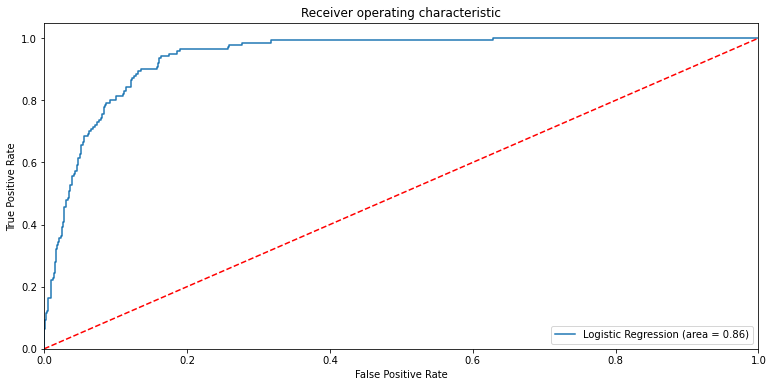

In [115]:
# Check with balanced target for the train data
# LR model without hyperparameter tuning
LR = LogisticRegression()
LR.fit(X_train_res, y_train_res)

print('Logistic Regression Scores without Hyperparameter Tuning with balanced data\n\n')
print('LR accuracy for train set: {0:.3f}'.format(LR.score(X_train_res, y_train_res)))
print('LR accuracy for test set: {0:.3f}'.format(LR.score(X_test, y_test)))

y_true, y_pred = y_test, LR.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
LR_roc_auc = roc_auc_score(y_true, LR.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, LR.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Logistic Regression (area = {})'.\
         format(LR_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

Logistic Regression Scores with Hyperparameter Tuning with balanced data


Best Hyper Parameters are:  {'C': 10, 'max_iter': 130, 'penalty': 'l2'}
Best Score is:  0.895
LR accuracy for train set: 0.891
LR accuracy for test set: 0.884

              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93      1354
         1.0       0.44      0.85      0.58       140

    accuracy                           0.88      1494
   macro avg       0.71      0.87      0.76      1494
weighted avg       0.93      0.88      0.90      1494


Confusion Matrix:
 [[1202  152]
 [  21  119]]

Accuracy Score:
 0.884


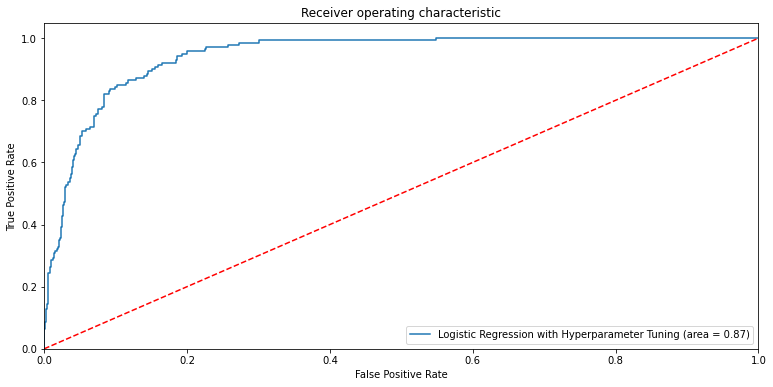

In [116]:
# Check with balanced target for the train data
# LR with hyperparameter tuning
LR = LogisticRegression(random_state = 42)

params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 110, 120, 130, 140]}

skf = StratifiedKFold(n_splits = 10)
LR_hyper = GridSearchCV(LR, param_grid = params, n_jobs = -1, cv = skf)

LR_hyper.fit(X_train_res, y_train_res)

print('Logistic Regression Scores with Hyperparameter Tuning with balanced data\n\n')
print('Best Hyper Parameters are: ', LR_hyper.best_params_)
print('Best Score is: ', LR_hyper.best_score_.round(3))

print('LR accuracy for train set: {0:.3f}'.format(LR_hyper.score(X_train_res, y_train_res)))
print('LR accuracy for test set: {0:.3f}'.format(LR_hyper.score(X_test, y_test)))

y_true, y_pred = y_test, LR_hyper.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
LR_hyper_roc_auc = roc_auc_score(y_true, LR_hyper.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, LR_hyper.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Logistic Regression with Hyperparameter Tuning (area = {})'.\
         format(LR_hyper_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

#  Naive Bayes classifiers

Naive Bayes Classifier with imbalanced data


NB accuracy for train set: 0.881
NB accuracy for test set: 0.884

              precision    recall  f1-score   support

         0.0       0.96      0.91      0.93      1354
         1.0       0.42      0.59      0.49       140

    accuracy                           0.88      1494
   macro avg       0.69      0.75      0.71      1494
weighted avg       0.91      0.88      0.89      1494


Confusion Matrix:
 [[1238  116]
 [  57   83]]

Accuracy Score:
 0.884


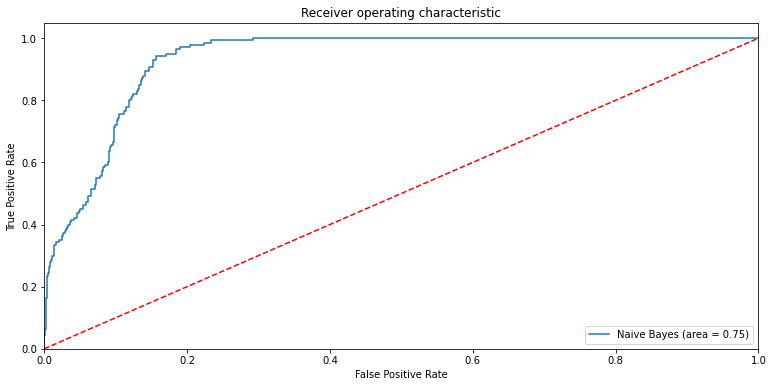

In [117]:
# Check with imbalanced target for the train data
NB = GaussianNB()
NB.fit(X_train, y_train)

print('Naive Bayes Classifier with imbalanced data\n\n')
print('NB accuracy for train set: {0:.3f}'.format(NB.score(X_train, y_train)))
print('NB accuracy for test set: {0:.3f}'.format(NB.score(X_test, y_test)))

y_true, y_pred = y_test, NB.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
NB_roc_auc = roc_auc_score(y_true, NB.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, NB.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Naive Bayes (area = {})'.\
         format(NB_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

Naive Bayes Classifier with balanced data


NB accuracy for train set: 0.882
NB accuracy for test set: 0.876

              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93      1354
         1.0       0.41      0.77      0.54       140

    accuracy                           0.88      1494
   macro avg       0.69      0.83      0.73      1494
weighted avg       0.92      0.88      0.89      1494


Confusion Matrix:
 [[1201  153]
 [  32  108]]

Accuracy Score:
 0.876


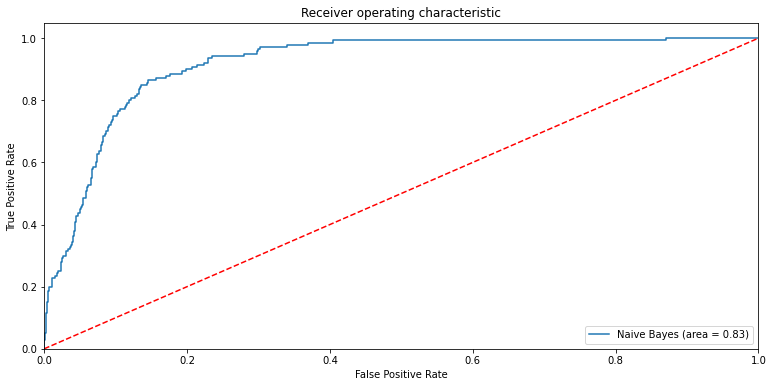

In [118]:
# Check with balanced target for the train data
NB = GaussianNB()
NB.fit(X_train_res, y_train_res)

print('Naive Bayes Classifier with balanced data\n\n')
print('NB accuracy for train set: {0:.3f}'.format(NB.score(X_train_res, y_train_res)))
print('NB accuracy for test set: {0:.3f}'.format(NB.score(X_test, y_test)))

y_true, y_pred = y_test, NB.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
NB_roc_auc = roc_auc_score(y_true, NB.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, NB.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Naive Bayes (area = {})'.\
         format(NB_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

#  Conclusion:

# Improvisation